<a href="https://colab.research.google.com/github/rodrigorissettoterra/analise-de-gorjetas/blob/main/An%C3%A1lise_de_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise estatística das gorjetas pagas.

##Importando bibliotecas e da base de dados 

In [20]:
import pandas as pd
import seaborn as sns

#Caso o seaborn não esteja instalado, executar a linha de código abaixo:
#!pip install seaborn

In [2]:
#Armazenei o arquivo no meu drive

dados = pd.read_csv('/content/drive/MyDrive/gorjetas.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


##Renomeando colunas

In [11]:
#Renomeando colunas

renomear_colunas = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

gorjetas = dados.rename(columns = renomear_colunas)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


##Traduzindo termos da base dados

In [12]:
#Descobrindo quais termos estão presentes na coluna 'sobremesa'
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
#Tradução dos termos 'Yes' e 'No', para 'Sim' e 'Não', respectivamente,
#na coluna 'sobremesa'.

sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,Não,Sun,Dinner,2
1,10.340000,1.660000,Não,Sun,Dinner,3
2,21.010000,3.500000,Não,Sun,Dinner,3
3,23.680000,3.310000,Não,Sun,Dinner,2
4,24.590000,3.610000,Não,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sat,Dinner,3
3412,25.531567,1.604021,Sim,Sat,Dinner,2
3413,21.547132,1.733914,Sim,Sat,Dinner,2
3414,18.966233,1.718951,Não,Sat,Dinner,2


In [14]:
#Verificação da ação
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [15]:
#Descobrindo quais dias estão presentes na base dados
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
#Tradução dos termos 'Sun', 'Sat', 'Thur' e 'Fri', para 'Domingo', 'Sábado', 'Quinta' e 'Sexta', respectivamente, 
#na coluna 'dia_da_semana'

dia = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,Não,Domingo,Dinner,2
1,10.340000,1.660000,Não,Domingo,Dinner,3
2,21.010000,3.500000,Não,Domingo,Dinner,3
3,23.680000,3.310000,Não,Domingo,Dinner,2
4,24.590000,3.610000,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Dinner,3
3412,25.531567,1.604021,Sim,Sábado,Dinner,2
3413,21.547132,1.733914,Sim,Sábado,Dinner,2
3414,18.966233,1.718951,Não,Sábado,Dinner,2


In [17]:
#Verificação da ação
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [18]:
#Descobrindo quais termos temos na coluna 'hora_do_dia'
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
#Tradução dos termos 'Dinner' e 'Lunch', para 'Jantar' e 'Almoço', respectivamente.
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
    }

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,Não,Domingo,Jantar,2
1,10.340000,1.660000,Não,Domingo,Jantar,3
2,21.010000,3.500000,Não,Domingo,Jantar,3
3,23.680000,3.310000,Não,Domingo,Jantar,2
4,24.590000,3.610000,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3
3412,25.531567,1.604021,Sim,Sábado,Jantar,2
3413,21.547132,1.733914,Sim,Sábado,Jantar,2
3414,18.966233,1.718951,Não,Sábado,Jantar,2


##Visualizações

###Análise I - Relação entre 'valor_da_conta' e 'gorjeta'

In [22]:
#Quantidade de registros da base de dados
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))

A base de dados contém 3416 registros 



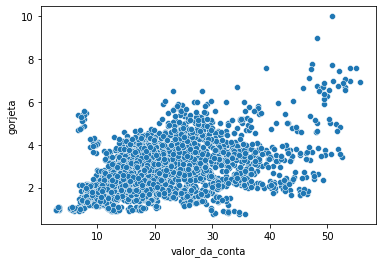

In [21]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

Pelo gráfico, nota-se que somente a análise visual não será suficente

In [25]:
#Criando uma coluna extra para armazenar a porcentagem entre a gorjeta e o valor da conta
#com arredondamento para 2 casas decimais
gorjetas['porcentagem'] = ((gorjetas['gorjeta'] / gorjetas['valor_da_conta'])*100).round(2)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,5.94
1,10.340000,1.660000,Não,Domingo,Jantar,3,16.05
2,21.010000,3.500000,Não,Domingo,Jantar,3,16.66
3,23.680000,3.310000,Não,Domingo,Jantar,2,13.98
4,24.590000,3.610000,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3,17.96
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,6.28
3413,21.547132,1.733914,Sim,Sábado,Jantar,2,8.05
3414,18.966233,1.718951,Não,Sábado,Jantar,2,9.06


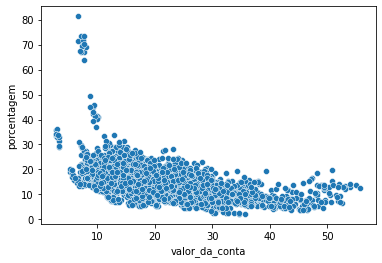

In [28]:
#Visualizando a relação do 'valor_da_conta' com 'porcentagem'
porcentagem_conta = sns.scatterplot( x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

Aparentemente, a porcentagem paga na gorjeta é inversamente proporcional ao valor da conta,
ou seja, para valores da conta maiores, costuma-se pagar uma porcentagem menor. 

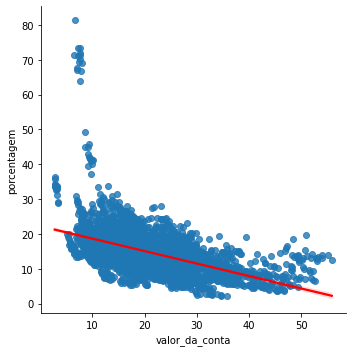

In [46]:
#Incluindo uma linha de tendência (vermelha) no gráfico acima
porcentagem_tendencia = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', line_kws={'color': 'red'}, data = gorjetas)
porcentagem_tendencia

###Análise II - Relação entre pedir 'sobremesa' e 'gorjeta' paga

In [37]:
#Filtro: Cliente que pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,15.349555
std,9.901358,1.162280,0.806690,8.907963
min,2.799644,0.766203,1.000000,2.140000
25%,13.495501,1.911661,2.000000,9.270000
50%,17.917059,2.434354,2.000000,14.685000
75%,26.807493,3.326298,3.000000,18.900000
max,55.804318,10.000000,5.000000,81.350000


In [38]:
#Filtro: Cliente que NÃO pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.00000
mean,19.223436,2.711837,2.668874,15.00430
std,8.316030,1.024271,1.014848,4.42013
min,6.533329,0.910509,1.000000,4.20000
25%,13.281977,1.931135,2.000000,12.06250
50%,17.736923,2.608222,2.000000,14.57500
75%,22.749482,3.284578,3.000000,17.79750
max,53.091371,9.000000,6.000000,33.48000


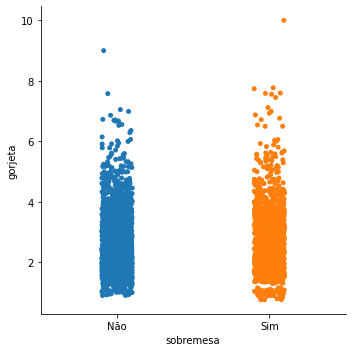

In [39]:
#Visualizando a relação existente entre pedir ou não pedir sobremesa, com a valor da conta
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

Visualmente falando, é difícil de ver diferença entre ambos os grupos

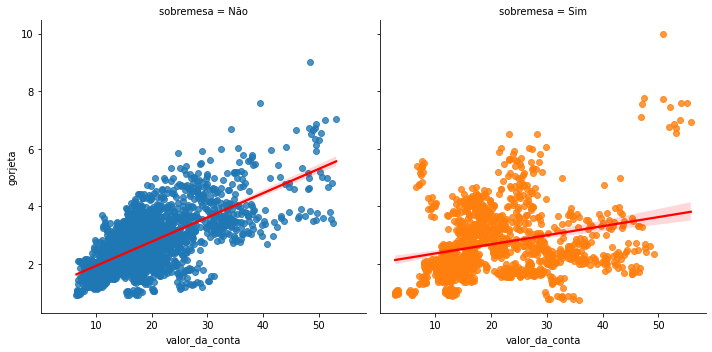

In [44]:
#Visualizando a relação existente entre pedir ou não pedir sobremesa, com a valor da conta,
#incluindo linha de tendência
sns.lmplot(
    x = 'valor_da_conta', 
    y = 'gorjeta', 
    hue = 'sobremesa', 
    col = 'sobremesa', 
    line_kws={'color': 'red'}, 
    data = gorjetas
    )

Visualmente existe uma diferença no valor da gorjeta entre aqueles que pediram e não pediram sobremesa.

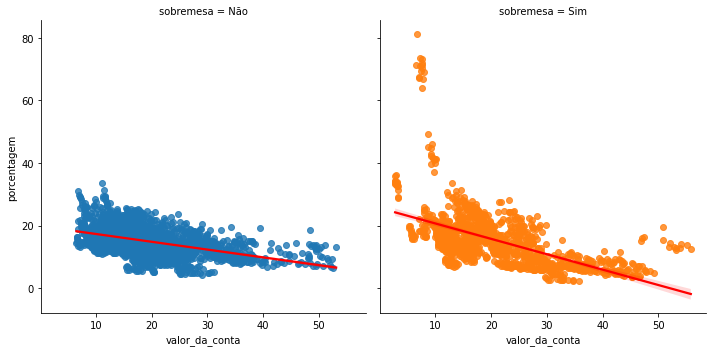

In [47]:
#Visualizando a relação existente entre pedir ou não pedir sobremesa, com a porcentagem da gorjeta,
#incluindo linha de tendência
sns.lmplot(
    x = 'valor_da_conta', 
    y = 'porcentagem', 
    col = 'sobremesa', 
    hue = 'sobremesa', 
    line_kws={'color':'red'},
    data=gorjetas)

Visualmente existe uma diferença na porcentagem da gorjeta entre aqueles que pediram e não pediram sobremesa.

####Teste de hipótese da sobremesa

H<sup>null</sup> => A distribuição da taxa da gorjeta é a mesma em ambos os grupos</br>
H<sup>alt</sup> => A distribuição da taxa da gorjeta NÃO é a mesma em ambos os grupos




In [48]:
#Importanto biblioteca para o cálculo do teste de hipótese
from scipy.stats import ranksums

In [49]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [57]:
r1 = ranksums(com_sobremesa, sem_sobremesa)
print('O valor valor de p-value é: {}\n'.format(r1.pvalue))

if r1.pvalue < 0.05:
  print('Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,')
  print('a Hipótese aceita é Alternativa =>')
  print('A distribuição da taxa da gorjeta NÃO é a mesma em ambos os grupos.')
else:
  print('Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>')
  print('A distribuição da taxa da gorjeta é a mesma em ambos os grupos.')

O valor valor de p-value é: 0.03615445709276227

Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,
a Hipótese aceita é Alternativa =>
A distribuição da taxa da gorjeta NÃO é a mesma em ambos os grupos.


###Análise III - Relação entre 'dia_da_semana' e 'gorjeta'

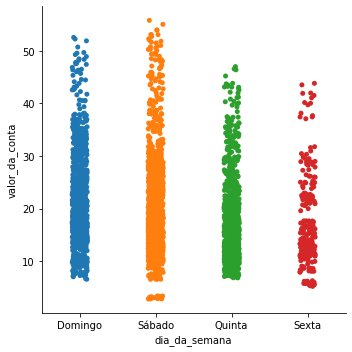

In [58]:
#Visualizando a distribuição do 'valor_da_conta' por 'dia_da_semana'
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

Aparentemente, Sábado é o dia de maior amplitude entre os dados

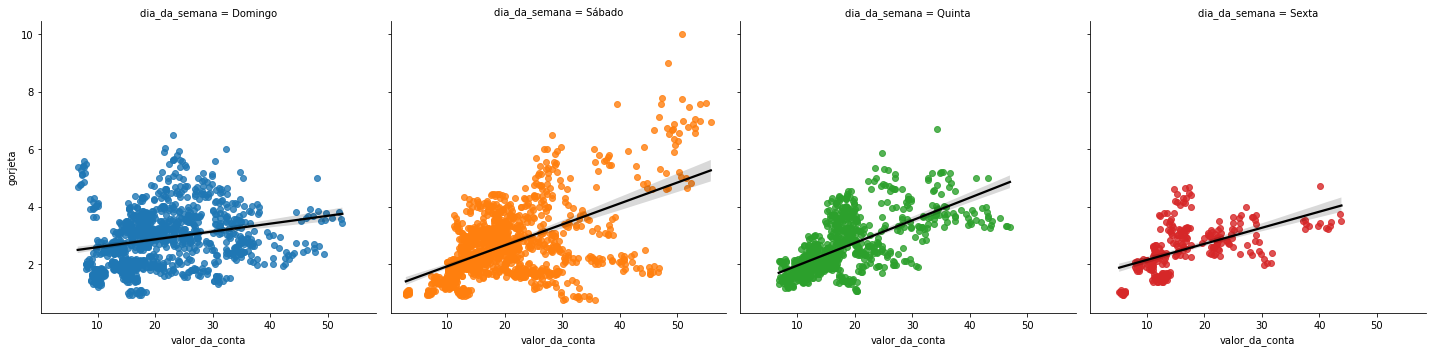

In [69]:
#Visualizando a relação entre o valor da gorjeta e o valor da conta, com linha de tendência, para cada dia da semana
sns.lmplot(
    x = 'valor_da_conta', 
    y = 'gorjeta', 
    hue = 'dia_da_semana', 
    col = 'dia_da_semana',
    line_kws={'color':'black'}, 
    data = gorjetas
    )

De uma forma geral, quanto maior for o valor da conta, maior o valor da gorjeta paga.

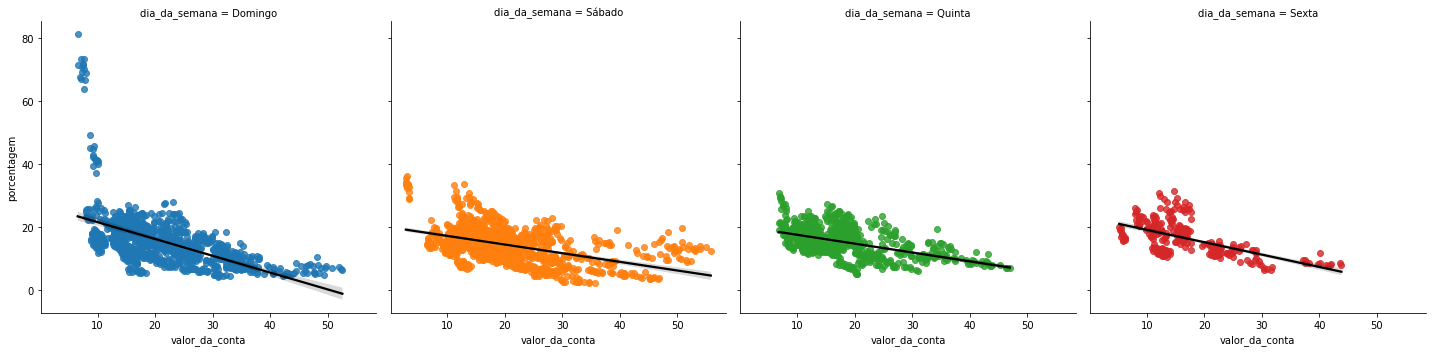

In [70]:
#Visualizando a relação entre o porcentagem e o valor da conta, com linha de tendência, para cada dia da semana
sns.lmplot(
    x = 'valor_da_conta', 
    y = 'porcentagem', 
    hue = 'dia_da_semana', 
    col = 'dia_da_semana', 
    line_kws={'color':'black'}, 
    data = gorjetas
    )

De uma forma geral, quanto maior for o valor da conta, menor a porcentagem paga.

####Cálculo das médias para cada dia

In [72]:
#Média geral
média_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(média_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


In [75]:
#Agrupado por dia
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,15.498430
Quinta,17.724088,2.556177,15.421532
Sexta,17.215616,2.549960,16.316955
Sábado,20.480249,2.690114,14.357701


Pelos dados apresentados, notamos que:
- Domingo é o dia em que a média de gorjetas pagas é maior, bem como o valor da conta.
- Sexta é o dia em que a porcentagem da gorjeta paga é maior. 
- Quinta e Sexta são dias em que se tem o menor valor da conta.

####Teste de Hipótese dos dias da semana

#####Sábado e Domingo

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo.

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no sábado e no domingo.

In [76]:
#Gorjetas
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

r2 = ranksums(valor_conta_sabado, valor_conta_domingo)
print('O valor valor de p-value é: {}\n'.format(r2.pvalue))

if r2.pvalue < 0.05:
  print('Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,')
  print('a Hipótese aceita é Alternativa =>')
  print('A distribuição do valor da conta é NÃO igual no sábado e no domingo.')
else:
  print('Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>')
  print('A distribuição do valor da conta é igual no sábado e no domingo.')

O valor valor de p-value é: 0.0004435935681441821

Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,
a Hipótese aceita é Alternativa =>
A distribuição do valor da conta é NÃO igual no sábado e no domingo.


#####Quinta e Sexta

**H<sup>null</sup>**
>A distribuição do valor da conta é igual na quinta e na sexta.

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual na quinta e na sexta.

In [93]:
#Gorjetas
valor_conta_quinta = gorjetas.query("dia_da_semana == 'Quinta'").valor_da_conta
valor_conta_sexta = gorjetas.query("dia_da_semana == 'Sexta'").valor_da_conta

r3 = ranksums(valor_conta_quinta, valor_conta_sexta)
print('O valor valor de p-value é: {}\n'.format(r3.pvalue))

if r3.pvalue < 0.05:
  print('Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,')
  print('a Hipótese aceita é Alternativa =>')
  print('A distribuição do valor da conta é NÃO igual na quinta e na sexta.')
else:
  print('Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>')
  print('A distribuição do valor da conta é igual na quinta e na sexta.')

O valor valor de p-value é: 0.22652441582425298

Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>
A distribuição do valor da conta é igual na quinta e na sexta.


###Análise IV - Relação entre 'hora_do_dia' e 'gorjeta'

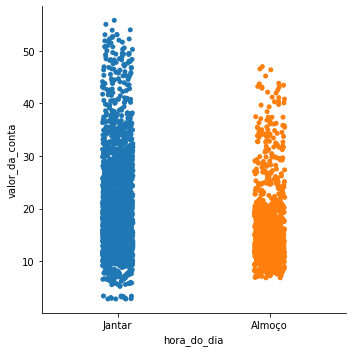

In [79]:
#Visualizando a distribuição de dados por 'hora_do_dia' e relacionando com 'valor_da_conta'
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

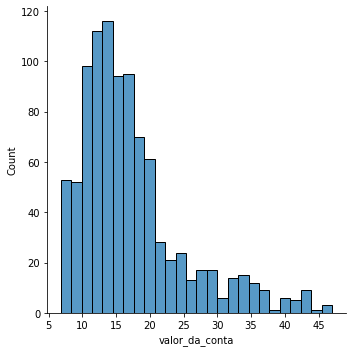

In [83]:
#Visualizando a concentração do valor_da_conta, no almoço
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.displot(almoco)

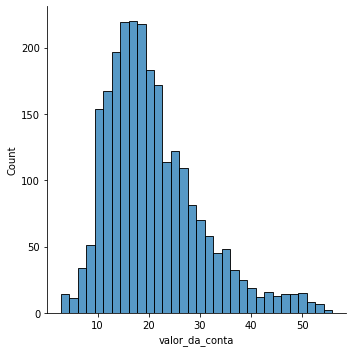

In [82]:
#Visualizando a concentração do valor_da_conta, no jantar
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.displot(jantar)

####Teste de hipótese das refeições

In [85]:
#Visualizando os valores médios separados por refeição
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,15.778498
Jantar,20.832954,2.779458,14.887614


**H<sup>null</sup>**
>A distribuição do valor da conta é igual no jantar e no almoço.

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no jantar e no almoço.

In [96]:
#Gorjetas
valor_conta_jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
valor_conta_almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

r4 = ranksums(valor_conta_jantar, valor_conta_almoco)
print('O valor valor de p-value é: {}\n'.format(r4.pvalue))

if r4.pvalue < 0.05:
  print('Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,')
  print('a Hipótese aceita é Alternativa =>')
  print('A distribuição do valor da conta é NÃO igual no jantar e no almoço.')
else:
  print('Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>')
  print('A distribuição do valor da conta é igual no jantar e no almoço.')

O valor valor de p-value é: 5.169201062207143e-34

Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,
a Hipótese aceita é Alternativa =>
A distribuição do valor da conta é NÃO igual no jantar e no almoço.


In [95]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,5.94
1,10.340000,1.660000,Não,Domingo,Jantar,3,16.05
2,21.010000,3.500000,Não,Domingo,Jantar,3,16.66
3,23.680000,3.310000,Não,Domingo,Jantar,2,13.98
4,24.590000,3.610000,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3,17.96
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,6.28
3413,21.547132,1.733914,Sim,Sábado,Jantar,2,8.05
3414,18.966233,1.718951,Não,Sábado,Jantar,2,9.06


In [97]:
#Porcentagens
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

r5 = ranksums(valor_conta_quinta, valor_conta_sexta)
print('O valor valor de p-value é: {}\n'.format(r5.pvalue))

if r4.pvalue < 0.05:
  print('Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,')
  print('a Hipótese aceita é Alternativa =>')
  print('A distribuição do valor da conta é NÃO igual no jantar e no almoço.')
else:
  print('Como p-value calculado é MAIOR que 0,05, acatamos a Hipótese Nula, portanto, =>')
  print('A distribuição do valor da conta é igual no jantar e no almoço.')

O valor valor de p-value é: 0.22652441582425298

Como p-value calculado é MENOR que 0,05, rejeitamos a Hipótese Nula, portanto,
a Hipótese aceita é Alternativa =>
A distribuição do valor da conta é NÃO igual no jantar e no almoço.
